<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Feature_Correlation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [4]:
Android.head(3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

In [5]:
Android['Related apps'] = Android['Related apps'].fillna(Android['Related apps'].mode()[0])

Android['Dangerous permissions count'] = Android['Dangerous permissions count'].fillna(Android['Dangerous permissions count'].median())

Android['Description'] = Android['Description'].fillna(Android['Description'].mode()[0])

Android['App'] = Android['App'].fillna(Android['App'].mode()[0])

In [6]:
List = ['App', 'Package', 'Category', 'Description', 'Related apps', 'Class']

In [7]:
X = Android.drop(columns=List)
y = Android['Class']

In [12]:
# FEATURE IMPORTANCE CORRELATION
# determine 20 most correlated features

df_corr_Android = Android.corr()['Class'].sort_values(ascending=False).head(20)
top_corr_features = df_corr_Android.index
top_corr_features

Index(['Class', 'Price', 'Your location : fine (GPS) location (D)',
       'Your location : mock location sources for testing (D)',
       'Services that cost you money : directly call phone numbers (D)',
       'Your location : access extra location provider commands (S)',
       'System tools : send sticky broadcast (S)',
       'Hardware controls : take pictures and videos (D)',
       'Your personal information : read calendar events (D)',
       'Your personal information : add or modify calendar events and send email to guests (D)',
       'Default : delete applications (S)',
       'Default : power device on or off (S)',
       'Your accounts : access other Google services (D)',
       'System tools : change your UI settings (D)',
       'System tools : change network connectivity (D)',
       'System tools : change Wi-Fi state (D)',
       'Your location : coarse (network-based) location (D)',
       'Default : directly install applications (S)',
       'Your messages : receive

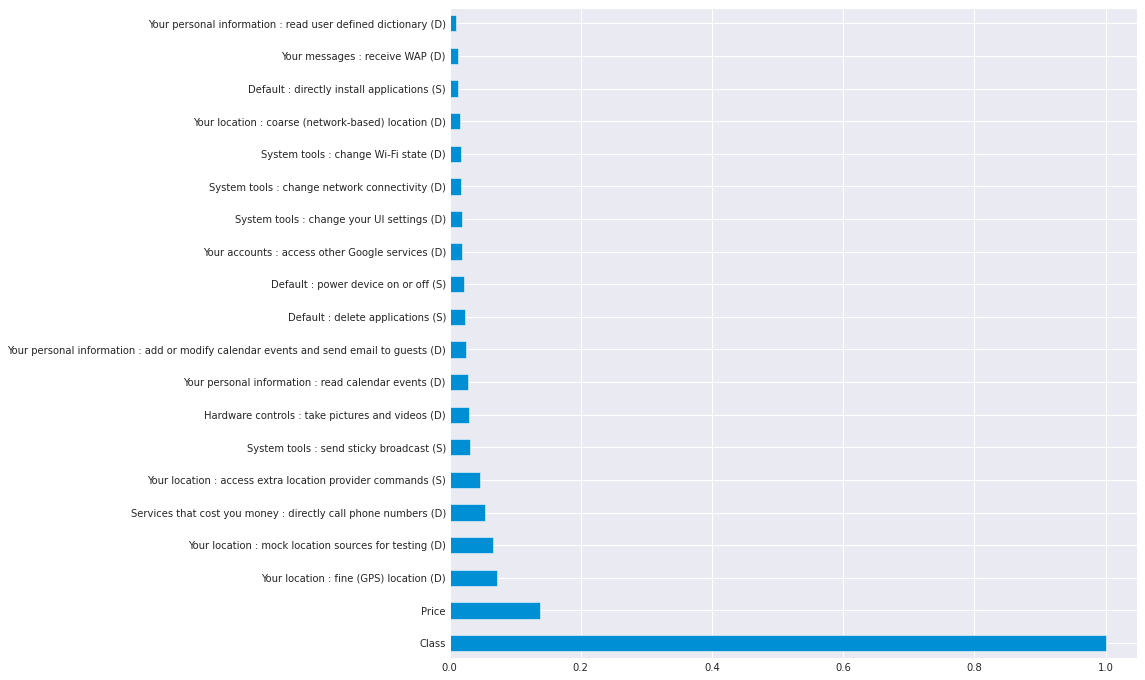

In [9]:
# plot top 20 most correlated features to our target (Class)
plt.figure(figsize=(11,12))
df_corr_Android.plot(kind='barh')
plt.show()

In [10]:
print(df_corr_Android)

Class                                                                                     1.000000
Price                                                                                     0.137288
Your location : fine (GPS) location (D)                                                   0.071757
Your location : mock location sources for testing (D)                                     0.065737
Services that cost you money : directly call phone numbers (D)                            0.054368
Your location : access extra location provider commands (S)                               0.046273
System tools : send sticky broadcast (S)                                                  0.030719
Hardware controls : take pictures and videos (D)                                          0.029734
Your personal information : read calendar events (D)                                      0.028033
Your personal information : add or modify calendar events and send email to guests (D)    0.025888
Default : 

In [11]:
# export selected features to .csv
df_corr_Android.to_csv('feature_selection_CORRELATION.csv')